In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage`: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

1. 결측치 언급  - 숫자형끼리, 카데고리형끼리 따로따로 처리해야함
2. 데이터형식을 보니, 오브젝트가많다.
3. 칼럼들마다 범위가 큰것도 있고, 어떤 칼럼은 범위가 작다.
4. 이 데이터셋을 보자마자, 사용할 수 있는 모델이 떠올라야한다.
= 데이터셋 - 거리가 중요한 칼럼들이 많다., 카데고리형 칼럼들이 많다., 데이터수가 적다 - 1400개(overfit, underfit(bias 현상)일어날수 있음)
=> 트리말고도 선형모델을 쓰는게 나을듯

여러 모델을 사용해서 예측을 하는 앙상블 기법이 사실 과적합 방지 기법이기도 하다!
1. 여러가지 관점으로 학습: generalize
2. variance 줄여준다.

In [5]:
# 결측치 처리

alldata = pd.concat([train,test], sort=False)
alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
alldata.drop(["Id","SalePrice"], 1, inplace=True)

In [7]:
alldata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
alldata = alldata.reset_index(drop=True) # concat을 하고 나면 무조건 해줘야함, 왜냐면 index숫자가 연속적으로 안된다.
alldata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
# 결측치 찾기

alldata.isnull().sum().sort_values(ascending = False)
#PoolQC: Pool quality ~ 수영장의 유무가 가격의 예측
# 숫자형 데이터 결측치에는 0으로 넣어도 문제가 발생하지않지만, 문자형 데이터 결측치는 "None"
#MiscFeature: Miscellaneous feature not 
#Alley: Type of alley access
#Fence: Fence quality
#FireplaceQu: Fireplace quality
#LotFrontage: Linear feet of street connected to property

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior1st         1
SaleType            1
Electrical          1
KitchenQual         1
GarageArea          1
GarageCars          1
OverallQual         0
OverallCond         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType  

In [10]:
alldata['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [11]:
alldata["PoolQC"].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [12]:
alldata["PoolArea"].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

poolArea

In [13]:
alldata[["PoolQC", "PoolArea"]][alldata["PoolArea"]!=0]

,PoolQC,PoolArea
197,Ex,512
810,Fa,648
1170,Gd,576
1182,Ex,555
1298,Gd,480
1386,Fa,519
1423,Gd,738
1974,Ex,144
2420,NaN,368
2503,NaN,444


In [14]:
# OverallQual: Overall material and finish quality => 이 칼럼이 PoolQC칼럼값을 잘 설명한다는것을 발견했다 correlation
alldata.loc[2420, 'PoolQC'] = 'Fa'
alldata.loc[2503, 'PoolQC'] = 'Gd'
alldata.loc[2599, 'PoolQC'] = 'Fa'

In [15]:
alldata[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']] = alldata[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].fillna("None")

In [16]:
alldata['LotFrontage'].dtypes

dtype('float64')

In [17]:
alldata['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

In [18]:
alldata["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [19]:
# LotFrontage ~ 지역별로 차이가 많이 난다. / 결측치를 지역별 평균으로 넣어준다.

alldata.groupby("Neighborhood")["LotFrontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
IDOTRR     62.241379
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

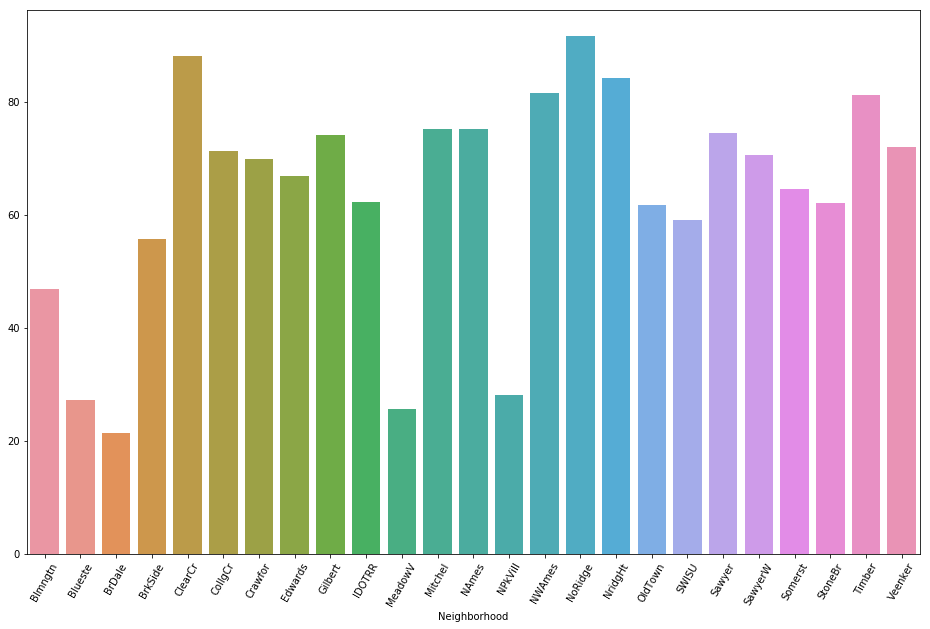

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,1, figsize=(16, 10))
sns.barplot(alldata.groupby("Neighborhood")["LotFrontage"].mean().index,
            alldata.groupby("Neighborhood")["LotFrontage"].mean().values)
plt.xticks(rotation = 60)

지역별 평균으로 lotfrontage 결측치를 넣어줘야겠다.

In [21]:
alldata["LotFrontage"] = alldata.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.median()))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text xticklabel objects>)

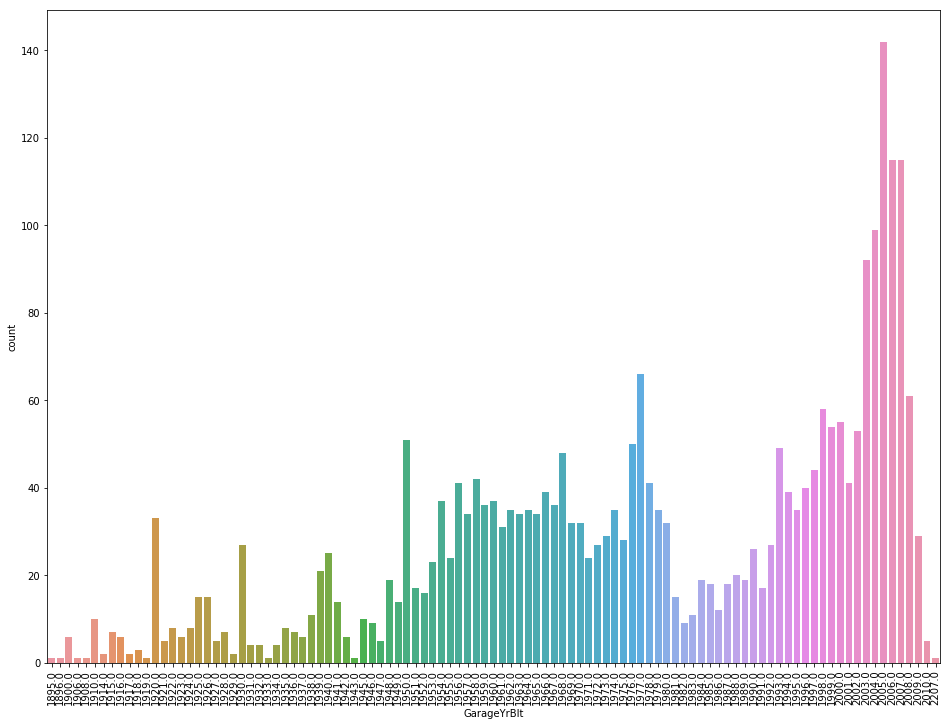

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1,1, figsize= (16,12))

sns.countplot(alldata["GarageYrBlt"])
plt.xticks(rotation = 90)

In [23]:
alldata[alldata["GarageYrBlt"] == 2207]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2592,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,None,None,None,0,9,2007,New,Partial


In [24]:
#alldata.loc[2592, 'GarageYrBlt'] = 2007
alldata.loc[alldata["GarageYrBlt"] == 2207,"GarageYrBlt"] = 2007

In [25]:
alldata.loc[alldata.GarageYrBlt.isnull()][["GarageFinish","GarageQual", "GarageYrBlt", "GarageCond", "GarageType"]]

#2126, 2576

,GarageFinish,GarageQual,GarageYrBlt,GarageCond,GarageType
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [26]:
# YearRemodAdd에 맞혀서 넣어줌
alldata.loc[2126, "GarageYrBlt"] = 1983.0
alldata.loc[2576, "GarageYrBlt"] = 1999.0

alldata.loc[2126, "GarageFinish"] = "RFn"
alldata.loc[2576, "GarageFinish"] = "Fin"

alldata.loc[2126, "GarageCond"] = "TA"
alldata.loc[2576, "GarageCond"] = "TA"

alldata.loc[2126, "GarageQual"] = "TA"
alldata.loc[2576, "GarageQual"] = "TA"

alldata.loc[2576, "GarageCars"] = 2.0 #중앙값
alldata.loc[2576, "GarageArea"] = 480.0 #평균

In [27]:
alldata.loc[2126]

MSSubClass            60
MSZoning              RM
LotFrontage           57
LotArea             8094
Street              Pave
Alley               Grvl
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     OldTown
Condition1          Norm
Condition2          Norm
BldgType          2fmCon
HouseStyle        2.5Unf
OverallQual            6
OverallCond            8
YearBuilt           1910
YearRemodAdd        1983
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      Wd Sdng
Exterior2nd      Wd Sdng
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          Mn
BsmtFinType1         Rec
BsmtFinSF1           196
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF           1046
TotalBsmtSF         1242
Heating             GasA
HeatingQC             Gd


In [28]:
# 결측치 넣을때 문자형 null => None,  숫자형 null => 0
alldata["GarageFinish"].fillna("None", inplace=True)
alldata["GarageQual"].fillna("None", inplace=True)
alldata["GarageCond"].fillna("None", inplace=True)
alldata["GarageType"].fillna("None", inplace=True)

alldata["GarageYrBlt"].fillna(0, inplace=True)

In [29]:
alldata.isnull().sum().sort_values()

MSSubClass        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
YrSold            0
MoSold            0
MiscVal           0
MiscFeature       0
Fence             0
PoolQC            0
CentralAir        0
PoolArea          0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageCond        0
ScreenPorch       0
Heating           0
HeatingQC         0
RoofMatl          0
YearBuilt         0
OverallCond       0
OverallQual       0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
YearRemodAdd      0
Neighborhood      0
LotConfig         0
LandContour       0
LotShape          0
Alley             0
Street            0


In [30]:
#결측치 처리

#overall quality 참조
alldata.loc[332, "BsmtFinType2"] = "Unf"
alldata.loc[2217, "BsmtQual"] = "Fa"
alldata.loc[2218, "BsmtQual"] = "Fa"
alldata.loc[948, "BsmtExposure"] = "Gd"
alldata.loc[1487, "BsmtExposure"] = "Av"
alldata.loc[2348, "BsmtExposure"] = "Mn"
alldata.loc[2040, "BsmtCond"] = "Gd"
alldata.loc[2185, "BsmtCond"] = "Fa"
alldata.loc[2524, "BsmtCond"] = "TA"

alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)

alldata["BsmtExposure"].fillna("None", inplace=True)
alldata["BsmtCond"].fillna("None", inplace=True)
alldata["BsmtQual"].fillna("None", inplace=True)
alldata["BsmtFinType2"].fillna("None", inplace=True)
alldata["BsmtFinType1"].fillna("None", inplace=True)


alldata.loc[773, "MasVnrArea"] = 0
alldata.loc[1230, "MasVnrArea"] = 0
alldata.loc[2452, "MasVnrArea"] = 0

alldata.loc[2610, "MasVnrType"] = "BrkFace"

alldata.loc[624, "MasVnrType"] = "BrkFace"
alldata.loc[1300, "MasVnrType"] = "BrkFace"
alldata.loc[1334, "MasVnrType"] = "BrkFace"
alldata.loc[1669, "MasVnrType"] = "Stone"

alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["MasVnrType"].fillna("None", inplace=True)


alldata.loc[1915, "MSZoning"] = "RL"
alldata.loc[2216, "MSZoning"] = "RL"
alldata.loc[2250, "MSZoning"] = "RL"
alldata.loc[2904, "MSZoning"] = "RL"

alldata.loc[2216, "Functional"] = "Maj1"
alldata.loc[2473, "Functional"] = "Maj1"
alldata.loc[1379, "Electrical"] = "SBrkr"
alldata.loc[1555, "KitchenQual"] = "TA"
alldata.loc[2151, "Exterior1st"] = "Plywood"
alldata.loc[2151, "Exterior2nd"] = "Plywood"
alldata.loc[2489, "SaleType"] = "WD"
alldata.loc[635, "TotRmsAbvGrd"] = 8
alldata.loc[2549, "MiscVal"] = 0
alldata.loc[873, "MiscVal"] = 4333
alldata.loc[1200, "MiscVal"] = 500
alldata.loc[2431, "MiscVal"] = 500
alldata.loc[1876, "YearRemodAdd"] = 2002.0
alldata.loc[2549, "YrSold"] = 2009
alldata.loc[523, "YrSold"] = 2008
alldata.loc[2295, "YrSold"] = 2008

In [31]:
alldata.isnull().sum().sort_values()

MSSubClass       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
GarageType       0
HalfBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
FullBath         0
CentralAir       0
GarageYrBlt      0
GarageCars       0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
PoolArea         0
GarageFinish     0
ScreenPorch      0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
3SsnPorch        0
SaleType         0
HeatingQC        0
TotalBsmtSF      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
LandContour      0
LotShape         0
Alley            0
Street      

In [32]:
alldata['Utilities'].value_counts()
#이 칼럼에서는 얻을수 있는 정보가 거의 없다 
# 하나의 데이터에 집중해서 몰려있는 imbalenced data ~ 과적합 일어날수 있기에 
# 이 칼럼은 그냥 삭제한다.

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [33]:
alldata.drop("Utilities", 1, inplace=True)

### Feature Engineering

In [34]:
#feature engineering #1 - feature 추가 (tree 모델은 동시의 칼럼 여러개의 교호작용을 못해서, 그러므로 성능을 올리기 위해 꼭 각각 칼럼을 미리 교호 작용할 수 있는 것들을 만들어줌)
# tree 모델이 교호작용을 잘 못하는 이유 ~ 질문을 하나씩 밖에 못 던짐

#연식
alldata["yr_sold_blt"] = (alldata.YrSold - alldata.YearBuilt)
#리모델링 이후의 연식
alldata["yr_sold_remod"] = (alldata.YrSold - alldata.YearRemodAdd)
#집 전체의 품질
alldata["cond_plus_qual"] = (alldata.OverallCond + alldata.OverallQual)
alldata["yr_remod_blt"] = (alldata.YearRemodAdd - alldata.YearBuilt)

선형 모델들이 성능이 잘 나온다.
- 앞으로 피쳐를 어떤식으로 만들어 낼것인가!
- 종속변수를 어떻게 처리할것인가?
- 칼럼들을 인코딩 해줄건데, 어떤 방식을 이용해야하며, 그 인코딩 방법을 코드화 해서 적용시키는 방법
- outlier 제거((그래프를 보고 아웃라이어 찾기))

In [35]:
# Feature Engineering #2
alldata["remod_blt_same"] = alldata["yr_remod_blt"].apply(lambda x: 1 if (x==0 or x==1) else 0)

alldata["yr_sold_garblt"] = (alldata.YrSold - alldata.GarageYrBlt)

alldata["yr_remod_garblt"] = (alldata.YearRemodAdd - alldata.GarageYrBlt)
alldata["yr_blt_garblt"] = (alldata.YearBuilt - alldata.GarageYrBlt)

alldata["yr_rg"] = alldata["yr_remod_garblt"].apply(lambda x: 1 if (x==0 or x==1) else 0)
alldata["yr_bg"] = alldata["yr_blt_garblt"].apply(lambda x: 1 if (x==0 or x==-1) else 0)

alldata.drop("yr_remod_garblt", 1, inplace=True)
alldata.drop("yr_blt_garblt", 1, inplace=True)

In [36]:
# Feature Engineering #3

alldata["haspool"] = alldata["PoolQC"].apply(lambda x: 0 if str(x)=="None" else 1) # 수영장의 유무
alldata["hasmisc"] = alldata["MiscFeature"].apply(lambda x: 0 if str(x)=="None" else 1)
alldata["hasalley"] = alldata["Alley"].apply(lambda x: 0 if str(x)=="None" else 1)
alldata["hasfence"] = alldata["Fence"].apply(lambda x: 0 if str(x)=="None" else 1)
alldata["hasfireplace"] = alldata["FireplaceQu"].apply(lambda x: 0 if str(x)=="None" else 1)
alldata["hasmasvnr"] = alldata["MasVnrType"].apply(lambda x: 0 if str(x)=="None" else 1)

alldata["has2ndfloor"] = alldata["2ndFlrSF"].apply(lambda x: 0 if x==0 else 1)
alldata["has3seasonporch"] = alldata["3SsnPorch"].apply(lambda x: 0 if x==0 else 1)
alldata["hasenclosedporch"] = alldata["EnclosedPorch"].apply(lambda x: 0 if x==0 else 1)
alldata["hasopenporch"] = alldata["OpenPorchSF"].apply(lambda x: 0 if x==0 else 1)
alldata["hasscreenporch"] = alldata["ScreenPorch"].apply(lambda x: 0 if x==0 else 1)
alldata["haswooddeck"] = alldata["WoodDeckSF"].apply(lambda x: 0 if x==0 else 1)
alldata['hasbsmt'] = alldata['TotalBsmtSF'].apply(lambda x: 0 if x==0 else 1)
alldata['hasgarage'] = alldata['GarageArea'].apply(lambda x: 0 if x==0 else 1)

alldata["canseebsmt"] = alldata["BsmtExposure"].apply(lambda x: 0 if (x=="None" or x=="No") else 1)

alldata["condition_norm2"] = alldata["Condition1"].apply(lambda x: 1 if str(x)=="Norm" else 0)
alldata["condition_norm1"] = alldata["Condition2"].apply(lambda x: 1 if str(x)=="Norm" else 0)
alldata["hasnormelec"] = alldata["Electrical"].apply(lambda x: 1 if str(x)=="SBrkr" else 0)
alldata["functyp"] = alldata["Functional"].apply(lambda x: 1 if str(x)=="Typ" else 0)
alldata["neatland"] = alldata["LandContour"].apply(lambda x: 1 if str(x)=="Lvl" else 0)
alldata["noslope"] = alldata["LandSlope"].apply(lambda x: 1 if str(x)=="Gtl" else 0)
alldata["regularlot"] = alldata["LotShape"].apply(lambda x: 1 if str(x)=="Reg" else 0)
alldata["newhomesale"] = alldata["SaleCondition"].apply(lambda x: 1 if str(x)=="Partial" else 0)

In [37]:
# Feature Engieering #4
alldata['Total_sqr_footage'] = (alldata['BsmtFinSF1'] + alldata['BsmtFinSF2'] +
                                 alldata['1stFlrSF'] + alldata['2ndFlrSF'])  # 집의 전체 크기
alldata['Total_Bathrooms'] = (alldata['FullBath'] + (0.5*alldata['HalfBath']) + 
                               alldata['BsmtFullBath'] + (0.5*alldata['BsmtHalfBath'])) # 화장실의 갯수
alldata['Total_porch_sf'] = (alldata['OpenPorchSF'] + alldata['3SsnPorch'] +
                              alldata['EnclosedPorch'] + alldata['ScreenPorch'] +
                             alldata['WoodDeckSF'])  # 베란다

### Modeling

In [38]:
# 종속변수 처리
y = train.SalePrice.reset_index(drop=True)
y = np.log1p(y) # log로 범위 정규화  # 혹시나 0인 값이 있을수 있기 때문에 1p  log  취한다

In [39]:
# 카데고리형 변수 처리  - 숫자를 str으로

type_to_str = ["BedroomAbvGr", "BsmtFullBath", "BsmtHalfBath", "Fireplaces", "FullBath", "GarageCars", "HalfBath", "KitchenAbvGr",
               "MSSubClass", "MoSold", 'remod_blt_same','yr_rg','yr_bg','haspool','hasmisc','hasalley','hasfence','hasfireplace','hasmasvnr','has2ndfloor','has3seasonporch','hasenclosedporch','hasopenporch','hasscreenporch',
 'haswooddeck',
 'hasbsmt',
 'hasgarage',
 'canseebsmt',
 'condition_norm2',
 'condition_norm1',
 'hasnormelec',
 'functyp',
 'neatland',
 'noslope',
 'regularlot',
 'newhomesale']
alldata[type_to_str] = alldata[type_to_str].astype(str)

In [40]:
#OneHotEncoding
final_alldata = pd.get_dummies(alldata)


In [41]:
final_alldata = final_alldata.drop(523)
final_alldata = final_alldata.drop(1298)
y = y.drop(523)
y = y.drop(1298)

In [42]:
X = final_alldata.iloc[:len(y),:]
testing_features = final_alldata.iloc[len(X):,:]

In [43]:
# # 라이브러리를 이용해서 자동으로 아웃라이어 찾기 (데이터가 만개 이하일때만 사용)
# import statsmodels.api as sm
# ols = sm.OLS(endog = y, exog = X)
# fit = ols.fit()
# test2 = fit.outlier_test()['bonf(p)']
# list(test2[test2<1e-3].index)


In [44]:
# 아웃라이어 제거
outliers = [30, 88, 462, 632, 1324]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [45]:
# 2. 과적합 위험성이 있는 칼럼 제거! ~ imbalenced Column 제거

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [46]:
overfit

['MSSubClass_150',
 'RoofMatl_ClyTile',
 'FullBath_4',
 'Fireplaces_4',
 'GarageCars_5.0']

In [47]:
X.drop(overfit,axis=1,inplace=True)
testing_features.drop(overfit,axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [51]:
(train["SalePrice"] / train["GrLivArea"]).sort_values()

1298     28.358738
30       30.372058
1062     38.510911
968      39.152893
523      39.510265
1292     45.320405
198      46.657694
410      47.021944
495      48.472222
676      49.041714
809      49.579046
705      50.366300
1349     51.738762
883      53.139013
1132     53.167421
1416     53.493450
812      53.633142
1387     53.840063
666      54.201681
242      54.861111
88       55.701180
1186     55.915244
93       58.446093
632      58.469171
250      58.575804
874      58.797524
1216     58.885384
635      58.910162
1068     60.055534
1011     60.096154
1362     60.356732
1279     60.638298
728      61.936937
398      62.209842
716      62.451057
1072     62.843407
1248     62.925170
505      63.520408
307      63.655761
897      63.818304
1031     63.919533
749      64.094179
1223     64.559925
1266     64.584436
628      64.903846
1048     64.935065
1173     64.970836
329      65.436242
1234     66.191446
488      66.280033
921      66.318182
1432     66.632231
431      66.

In [55]:
train.loc[train["GrLivArea"]>4000]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [56]:
train["GrLivArea"].sort_values()

533      334
1100     438
916      480
29       520
528      605
696      616
489      630
434      630
1449     630
614      630
1039     630
649      630
1212     672
402      672
1001     691
1337     693
438      694
1123     698
1323     708
1321     720
353      720
495      720
710      729
68       747
935      747
372      752
125      754
264      764
543      767
952      768
1406     768
547      768
797      773
1326     774
268      778
59       780
826      784
383      784
393      788
107      789
514      789
1376     790
677      792
638      796
1325     796
636      800
325      803
1428     804
450      813
1153     816
582      816
1327     816
1332     816
274      816
1112     816
52       816
592      816
548      825
532      827
617      832
1114     833
1407     833
98       835
586      838
127      840
341      841
1035     845
71       845
1368     848
593      848
721      848
1422     848
811      848
1078     848
203      848
690      848
1441     848

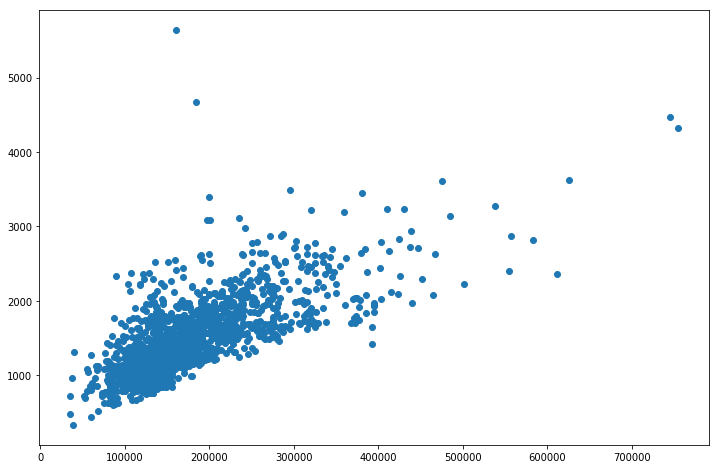

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1,1, figsize = (12,8))
plt.scatter(train["SalePrice"], train["GrLivArea"])

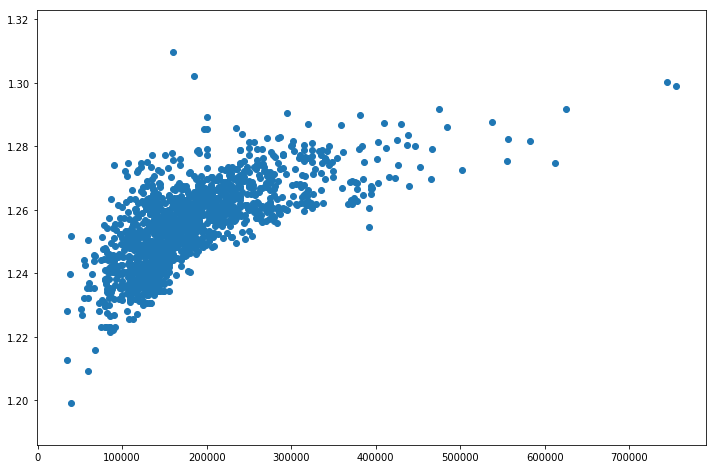

In [59]:
fig, axes = plt.subplots(1,1, figsize = (12,8))
plt.scatter(train["SalePrice"], np.power(train["GrLivArea"], 1/32))

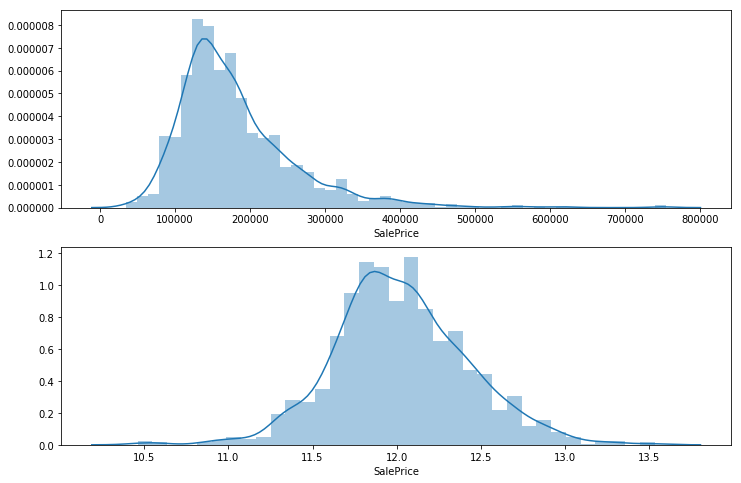

In [58]:
fig, axes = plt.subplots(2,1, figsize = (12,8))
sns.distplot(train["SalePrice"], ax = axes[0])
sns.distplot(np.log(train["SalePrice"]), ax = axes[1])  #overfitting 방지 효과

모델 6개를 만들어서 스태킹 활용, 앙상블 기법 활용
1. 이 데이터셋에 들어있는 칼럼들의 내용을 보니, 정말 숫자들에 의미가 있는 칼럼들이 많으므로 선형모델이나 거리기반의 학습을 하는 모델들을 이용할 수 있을것 같다.
2. 카테고리형 변수도 꽤 있다? 그러면 트리모델도 이용해야겠다.
3. 앙상블 통해서 1번 2번 을 합쳐줌
4. 데이터의 수가 적다! 데이터가 적으면 상대적으로 트리모델과 뉴럴네트워크 모델들의 성능이 떨어진다. 데이터의 갯수가 적을때, 트레인셋과 테스트셋의 분포가 다르면 트레인셋이 테스트셋을 충분히 반영하지 못하기 때문에!!


In [48]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline    #파이프라인은 여러가지 작업을 한번에 동시에 해줄때~ (scaling 과 모델링을 동시에 해주고 싶을때)
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV  # 칼럼을 학습할때 Regularization을 적용(overfit 방지) L1, L2  #cross validation system을 사용한 Ridge=> RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor


In [50]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=23) #KFold를 쓰면 overfitting을 막을 수 있음.

In [84]:
#alphas => L2 규제화를 얼마나 해줄 것인가.
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]


ridge_model = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(X, y)

In [85]:
#ridge_model 평가

#scoring : 어떻게 평가할 것인가
#neg_mean_squared_error ~  사이킷런에서 cross_val_score를 이용해서 모델의 점수를 최적화할때는,점수평가방식(scoring)이 점수가 크면 클수록 최적화, 좋다고 생각해버린다. 따라서 rmse 최소화 = -rmse 최대화

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)
cv_rmse(ridge_model).mean()

0.10801281964987539

* 15 -> 0.10801832408607011
1 * 20 -> 0.10801210905889476
* 23 -> 0.10804941425545386
* 24 -> 0.10806615354503575
* 25 -> 0.10808460439376355
* 26 -> 0.10810455995460477
* 30 -> 0.10819621404794125


In [86]:
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]

lasso_model = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7, alphas = alphas2,
                                    random_state = 42)).fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_model = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio)).fit(X, y)


In [ ]:
xgb_model = XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     subsample=0.7,
                     colsample_bytree=0.7, 
                   seed=27, reg_alpha=0.00006)
xgb_model.fit(X, y)



In [ ]:
lgbm_model =  LGBMRegressor(num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                               subsample = 0.8, colsample_bytree = 0.2319)
lgbm_model.fit(X, y)

In [ ]:
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

In [ ]:
lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas2,
                              random_state = 42, cv=kfolds))

In [ ]:
elasticnet = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

In [ ]:
lightgbm = make_pipeline(RobustScaler(),
                       LGBMRegressor(num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                               subsample = 0.8, colsample_bytree = 0.2319
                              ))


In [ ]:
xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3, 
                     subsample=0.7,
                     colsample_bytree=0.7, 
                   seed=27, reg_alpha=0.00006))



In [ ]:
#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, 
                                            xgboost, lightgbm), 
                               meta_regressor=xgboost, use_features_in_secondary=True)

#prepare dataframes
stackX = np.array(X)
stacky = np.array(y)
stack_gen_model = stack_gen.fit(stackX, stacky)
stack_gen_preds = stack_gen_model.predict(testing_features)

em_preds = elastic_model.predict(testing_features)
lasso_preds = lasso_model.predict(testing_features)
ridge_preds = ridge_model.predict(testing_features)
xgb_preds = xgb_model.predict(testing_features)
lgbm_preds = lgbm_model.predict(testing_features)

stack_preds = ((0.2*em_preds) + (0.1*lasso_preds) + (0.1*ridge_preds) + 
               (0.2*xgb_preds) + (0.1*lgbm_preds) + (0.3*stack_gen_preds))
submission = pd.read_csv("../input/sample_submission.csv")
submission.iloc[:, 1] = np.floor(np.expm1(stack_preds))
submission.to_csv("final_submission.csv", index=False) 